In [1]:
import pandas as pd
import numpy as np
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import matplotlib.pyplot as plt
from scipy import stats

sdf = pd.DataFrame.spatial.from_featureclass("Chapter13_14.gdb\DLSF_Data_SE")
sdf = sdf[['Station', 'AvgDLSpF', 'Latitude', 'AvgDLSpF_Lag', 'AvgDLSpF_Diff']]
sdf 

,Station,AvgDLSpF,Latitude,AvgDLSpF_Lag,AvgDLSpF_Diff
0,"Edenton, NC",85.27,36.02,93.22,-8
1,"Hopewell, VA",96.00,37.30,110.62,-15
2,"Tarboro, NC",93.22,35.88,112.55,-19
3,"Kinston, NC",91.44,35.20,93.22,-2
4,"Southport, NC",82.85,33.92,75.42,7
...,...,...,...,...,...
71,"Troy, AL",74.41,31.80,82.27,-8
72,"Scottsboro, AL",98.02,34.67,109.88,-12
73,"De Funiak Springs, FL",71.33,30.72,74.41,-3
74,"Talladega, AL",97.83,33.42,99.85,-2


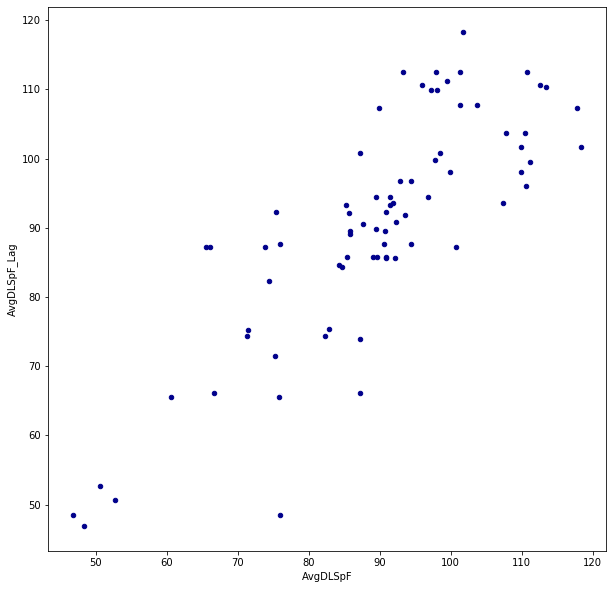

In [2]:
ax1 = sdf.plot.scatter(x="AvgDLSpF",y="AvgDLSpF_Lag",c='DarkBlue', figsize=(10,10)) 

In [6]:
r, pvalue = stats.pearsonr(sdf["AvgDLSpF"], sdf["AvgDLSpF_Lag"])
print("r:", r)
print("pvalue:", pvalue)

r: 0.8168936550001351
pvalue: 2.32329293214603e-19


slope: 0.8529873535803749
intercept: 13.919495989152367


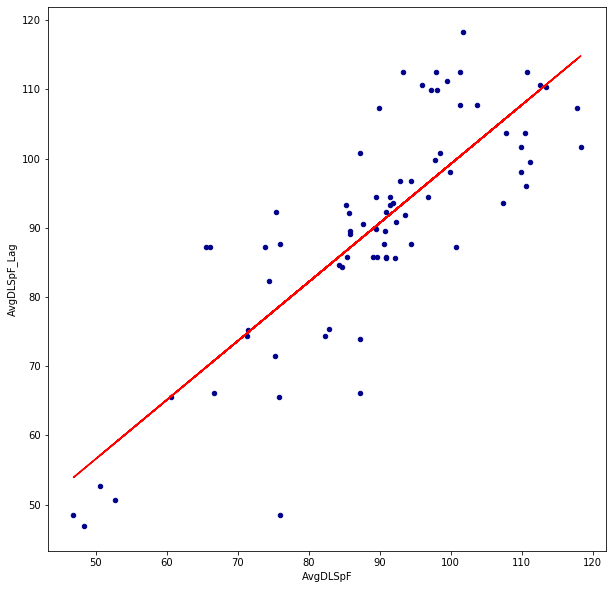

In [7]:
ax1 = sdf.plot.scatter(x="AvgDLSpF",y="AvgDLSpF_Lag",c='DarkBlue', figsize=(10,10)) 
x = sdf.AvgDLSpF
y = sdf.AvgDLSpF_Lag

regressStats = stats.linregress(x, y)
slope = regressStats.slope
intercept = regressStats.intercept
print("slope:", slope)
print("intercept:", intercept)
plt.plot(x, slope * x + intercept, color="red")

In [8]:
rsq = regressStats.rvalue**2
print("R-squared: %f" % rsq)

R-squared: 0.667315
